In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import pickle
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
data_path = '/content/drive/MyDrive/webb lab DL/peak by cell matrices/da_peaks_data'
# ncols=5038
females_data = pd.read_csv(f"{data_path}/neurons_F_dapeaks_X.csv", header=0 )
males_data = pd.read_csv(f"{data_path}/neurons_M_dapeaks_X.csv", header=0)
males_data.shape

(12316, 39)

In [16]:
female_labels = pd.read_csv(f"{data_path}/labels_neurons_F_dapeaks_chrX.csv", header=0)
male_labels = pd.read_csv(f"{data_path}/labels_neurons_M_dapeaks_all.csv", header=0)



In [10]:
regions = pd.read_csv(f"{data_path}/regionschrX.csv")

In [20]:
# females_data = females_data.T
# males_data = males_data.T

female_labels

,x
0,A
1,A
2,A
3,A
4,A
...,...
11415,A
11416,A
11417,A
11418,A


In [11]:
females_data


,chrX.50614426.50615387,chrX.169986567.169987514,chrX.135948499.135949464,chrX.136094181.136095125,chrX.103695053.103696076,chrX.135984575.135985573,chrX.136761159.136762155,chrX.50602431.50603442,chrX.50599727.50600690,chrX.75733341.75734382,...,chrX.101384466.101385436,chrX.56454342.56455142,chrX.16619368.16620176,chrX.77433104.77434035,chrX.152643823.152644819,chrX.134807495.134808434,chrX.102115374.102116289,chrX.73773858.73774861,chrX.111462882.111463831,chrX.94540137.94541178
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,1,0,1,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11416,0,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11417,0,2,0,0,1,0,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
11418,0,0,0,0,1,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# females_data = females_data.loc[:, (females_data != 0).any(axis=0)]
# males_data = males_data.loc[:, (males_data != 0).any(axis=0)]
# females_data.shape

In [19]:
# print(encoded_f_labels)
# codes = {'A':1,'Y':0}
# encoded_f_labels = female_labels['x'].map(codes)
# encoded_m_labels = male_labels['x'].map(codes)
# one_hot_encoded_female_labels = pd.get_dummies(female_labels, columns = ['x'])
# one_hot_encoded_male_labels = pd.get_dummies(male_labels, columns = ['x'])

# one_hot_encoded_female_labels
#one_hot_encoded_male_labels.shape

encoded_f_labels = np.where(female_labels == 'A', 1, 0)
encoded_m_labels = np.where(male_labels == 'A', 1, 0)


In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.8 MB/s eta 0:00:00


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def svm_classify(X_train_F, Y_train_F, X_test_F, Y_test_F, X_M, Y_M):
  clf = SVC(kernel="linear", verbose=1, gamma=1)
  clf.fit(X_train_F, Y_train_F)
  female_predictions = clf.predict(X_test_F)
  
  #female_predictions = np.where(female_predictions >=0.5, 1, 0)
  print("Accuracy:",metrics.accuracy_score(Y_test_F, female_predictions))
  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(Y_test_F, female_predictions, zero_division = "warn"))
# Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(Y_test_F, female_predictions, zero_division = "warn"))
  print("Recall:",metrics.f1_score(Y_test_F, female_predictions, zero_division = "warn"))

  print("----- MALE DATA -------")
  male_predictions = clf.predict(X_M)
  male_predictions = np.where(male_predictions >=0.5, 1, 0)
  print("Accuracy:",metrics.accuracy_score(Y_M, male_predictions))
  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(Y_M, male_predictions, zero_division = "warn"))
# Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(Y_M, male_predictions, zero_division = "warn"))
  print("Recall:",metrics.f1_score(Y_M, male_predictions, zero_division = "warn"))


  return female_predictions, male_predictions

def xg (X_train_F_, Y_train_F, X_test_F, Y_test_F, X_M, Y_M):
  clf = xgboost.XGBClassifier()
  clf.fit(X_train_F, Y_train_F)
  female_predictions = clf.predict(X_test_F)
  female_predictions = np.where(female_predictions >=0.5, 1, 0)
  print("Accuracy:",metrics.accuracy_score(Y_test_F, female_predictions))
  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(Y_test_F, female_predictions))
# Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(Y_test_F, female_predictions))
  print("Recall:",metrics.f1_score(Y_test_F, female_predictions, zero_division = "warn"))

  print("----- MALE DATA -------")
  male_predictions = clf.predict(X_M)
  print("Accuracy:",metrics.accuracy_score(Y_M, male_predictions))
  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(Y_M, male_predictions, zero_division = "warn"))
# Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(Y_M, male_predictions, zero_division = "warn"))
  print("Recall:",metrics.f1_score(Y_M, male_predictions, zero_division = "warn"))

  return female_predictions, male_predictions

def plot_confusion_matrix(Y_predictions, Y_true):
  confmat_F = confusion_matrix(Y_true, Y_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=confmat_F)
  disp.plot()


In [41]:
num_females = females_data.shape[0]
half_idx = math.ceil(0.5*num_females)

# idx = np.random.permutation(len(Y_train)) 
X_M = males_data
Y_M = encoded_m_labels

indices = np.arange(num_females)
np.random.shuffle(indices)
females_data = females_data.iloc[indices]
encoded_f_labels = encoded_f_labels[indices]

X_train_F, X_test_F = (females_data.iloc[:half_idx, :]), (females_data.iloc[half_idx:, :])
print(X_train_F.shape, X_test_F.shape)
Y_train_F, Y_test_F = encoded_f_labels[:half_idx], encoded_f_labels[half_idx:]

Y_test_F.shape

female_predictions, male_predictions = xg(X_train_F, Y_train_F, X_test_F, Y_test_F, X_M, Y_M)  
#female_predictions = np.where(female_predictions >=0.5, 1, 0)


(5710, 39) (5710, 39)
Accuracy: 0.6323992994746059
Precision: 0.41812400635930047
Recall: 0.1317635270541082
Recall: 0.20038095238095235
----- MALE DATA -------
Accuracy: 0.3640792465086067
Precision: 0.5842696629213483
Recall: 0.032882256228658154
Recall: 0.06226053639846744


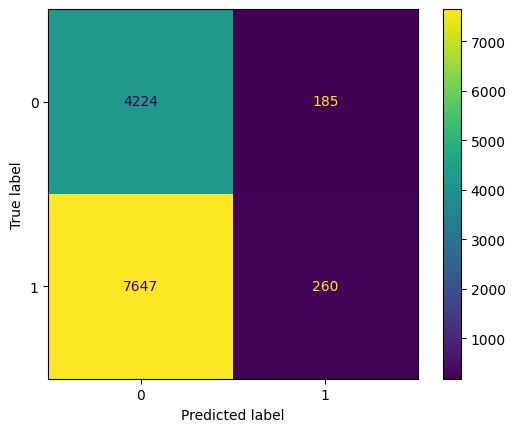

In [44]:
plot_confusion_matrix(male_predictions, Y_M)
 
#female_predictions.to_numpy()


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = female_predictions
fpr_keras, tpr_keras, thresholds_keras = roc_curve(female_labels[half_idx:], y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()